### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import re

In [3]:
# Load the dataset

df = pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True) # drop the columns

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ["class","message"] # change the column name

In [7]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df["len"] = [len(text) for text in df.message]

In [9]:
df.head()

,class,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
df.describe()

,len
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [11]:
df.groupby('class').describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [12]:
df["class"].value_counts()/df["class"].shape[0]*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

In [13]:
df["class"].shape

(5572,)

In [14]:
df.head()

,class,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Word Cloud

In [15]:
stopwords_list = nltk.corpus.stopwords.words("english") # stopwords list for english
tokener = nltk.word_tokenize # to tokenize

In [16]:
from collections import Counter
common_words={'word':[],'count':[]}

for word in df['message']:
    tok = tokener(word)
    #print(tok)
    m_counter = Counter(tok)
    #print(m_counter)
    #print(m_counter.most_common(1))
    common_words['word'].append(m_counter.most_common(1)[0][0])
    common_words['count'].append(m_counter.most_common(1)[0][1])
    #print("=============")


In [17]:
common_words_df = pd.concat([df,pd.DataFrame(common_words)],axis=1)
common_words_df

,class,message,len,word,count
0,ham,"Go until jurong point, crazy.. Available only ...",111,...,2
1,ham,Ok lar... Joking wif u oni...,29,...,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,to,3
3,ham,U dun say so early hor... U c already then say...,49,U,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,he,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,.,3
5568,ham,Will Ì_ b going to esplanade fr home?,37,Will,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,Pity,1
5570,ham,The guy did some bitching but I acted like i'd...,125,The,1


In [18]:
#' '.join(common_words_df['word'])

In [19]:
#! pip install wordcloud
import wordcloud
words_cloud = wordcloud.WordCloud().generate_from_text(' '.join(common_words_df['word']))

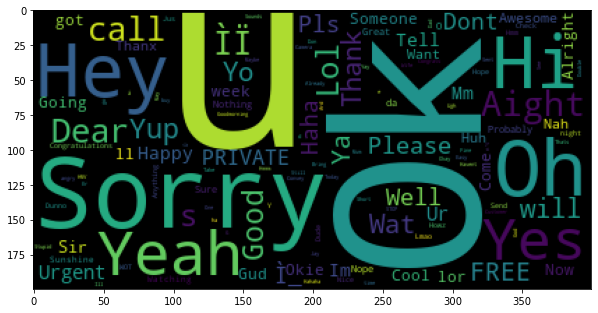

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.imshow(words_cloud)

In [21]:
df.head()

,class,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df.drop(["len"],axis=1,inplace=True)

In [23]:
def remove_punch(text):
    clean_words = re.sub(r"[^a-zA-Z0-9]"," ",text.lower())
    return clean_words

df.message = df.message.apply(remove_punch)

In [24]:
df.message

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: message, Length: 5572, dtype: object

In [25]:
def remove_whitespace(text):
    cleaned_space = re.sub(' +'," ",text)
    return cleaned_space
df.message = df.message.apply(remove_whitespace)

In [26]:
df.message[0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat '

In [27]:
def remove_stopwords(text):
    tok_word = tokener(text)
    clean_words=[]
    for word in tok_word:
        if word in stopwords_list:
            continue
        else: 
            clean_words.append(word)
    words = ' '.join(clean_words)
    return words

df.message = df.message.apply(remove_stopwords)

In [28]:
df.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [29]:
ham_class = df[df['class']=="ham"]
spam_class = df[df['class']=="spam"]

In [30]:
ham_class.message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: message, Length: 4825, dtype: object

In [31]:
ham_text = ' '.join(ham_class.message)
spam_text = ' '.join(spam_class.message)

In [32]:
ham_words_cloud = wordcloud.WordCloud().generate_from_text(ham_text)
spam_words_cloud = wordcloud.WordCloud().generate_from_text(spam_text)

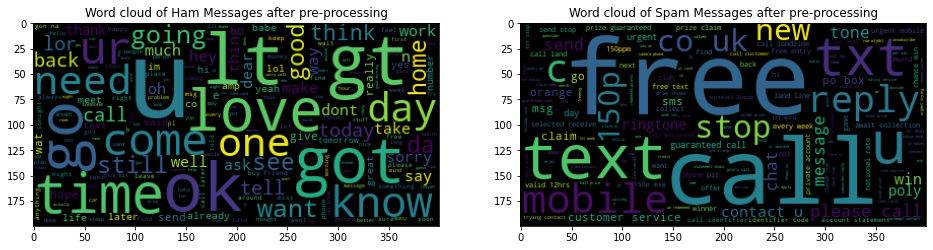

In [33]:
plt.figure(figsize=(16,12))
plt.subplot(121)
plt.title("Word cloud of Ham Messages after pre-processing")
plt.imshow(ham_words_cloud)
plt.subplot(122)
plt.title("Word cloud of Spam Messages after pre-processing")
plt.imshow(spam_words_cloud)

In [34]:
def remove_digits(text):
    clean_words = re.sub(r"[^a-zA-Z]"," ",text.lower())
    return clean_words

df.message = df.message.apply(remove_digits)

In [35]:
df.message[2]

'free entry   wkly comp win fa cup final tkts   st may      text fa       receive entry question std txt rate c apply            over  '

In [36]:
df.message = df.message.apply(remove_whitespace)

In [37]:
df.message[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over '

In [38]:
lm=nltk.WordNetLemmatizer()

In [39]:
def lemma(text):
    tok_word = tokener(text)
    lemma_word =[]
    # print("token :",tok_word)
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
    # print("lemmatization :",lemma_word)
    final_text= " ".join(lemma_word)
    # print("Final text :",final_text)
    return final_text

In [40]:
df.message = df.message.apply(lemma)

### Bag of words

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=2500,ngram_range=(1,2))
scaled_X = cv.fit_transform(df.message)

In [42]:
df_bow_sklearn = pd.DataFrame(scaled_X.toarray(),columns=cv.get_feature_names())
df_bow_sklearn.head()

c:\Users\dell pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aathi,abiola,able,abt,ac,acc,accept,access,accidentally,account,...,ym,yo,yo yo,yoga,yogasana,yr,yun,yup,yup thk,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df['class'] = df['class'].map({'spam':1,'ham':0})

In [44]:
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_bow_sklearn,df['class'],test_size=0.3,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)



RandomForestClassifier()

In [46]:
y_pred = clf.predict(X_test)

In [47]:
# metrics
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.9706937799043063

In [48]:
clf.score(X_train,y_train)

0.9997435897435898

In [49]:
clf.score(X_test,y_test)

0.9706937799043063

### TF-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(ngram_range=(1,3),max_features=2500)
scaled_X_tf =  tf_idf.fit_transform(df.message)


In [51]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names())
df_tfidf_sklearn.head()

c:\Users\dell pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aathi,abiola,able,abt,ac,acc,accept,access,account,account statement,...,yet,yijue,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn,df['class'],test_size=0.3,random_state=42)

In [53]:
clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
clf_tfidf.score(X_train,y_train)

0.9994871794871795

In [55]:
clf_tfidf.score(X_test,y_test)

0.9820574162679426

### Word2Vec

In [56]:
! pip install gensim

In [57]:
df.head()

,class,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [58]:
df.shape

(5572, 2)

In [59]:
df['class']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: class, Length: 5572, dtype: int64

In [60]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
words=[]
classList=[]
for sent,classVal in zip(df['message'],df['class']):
    sent_token = sent_tokenize(sent)
    
    for sent in sent_token:
        words.append(simple_preprocess(sent))
        classList.append(classVal)


In [61]:
# from gensim.utils import simple_preprocess

import gensim
import gensim.downloader as api
#wv=api.load('word2vec-google-news-300')

In [62]:
len(words)

5564

In [63]:
model = gensim.models.Word2Vec(words,window=5,min_count=2)

In [64]:
model.corpus_count

5564

In [65]:
df.shape

(5572, 2)

In [66]:
model.epochs

5

In [67]:
model.wv.similar_by_word('world')

[('say', 0.9995360374450684),
 ('ur', 0.999510645866394),
 ('tell', 0.9995072484016418),
 ('like', 0.9994912147521973),
 ('back', 0.9994843006134033),
 ('think', 0.999481737613678),
 ('feel', 0.9994805455207825),
 ('come', 0.9994804263114929),
 ('one', 0.9994801878929138),
 ('need', 0.9994800686836243)]

In [68]:
model.wv['say']

array([-0.27275208,  0.5384218 ,  0.13024808,  0.05436248,  0.03528192,
       -0.6835208 ,  0.27101073,  1.0073558 , -0.33673337, -0.2855458 ,
       -0.19977084, -0.75930136,  0.01880155,  0.17688483,  0.1504414 ,
       -0.38095814, -0.037538  , -0.544482  ,  0.01945456, -0.77620584,
        0.27501082,  0.33087373,  0.14376228, -0.05866611, -0.13915549,
        0.03656396, -0.37878427, -0.4700272 , -0.38954043,  0.15335663,
        0.3875988 ,  0.06414373,  0.14965193, -0.26553854, -0.15204777,
        0.59168345,  0.03026666, -0.48688146, -0.29683334, -0.81773925,
       -0.03173765, -0.3999649 , -0.11851925,  0.05685357,  0.46187085,
       -0.18210028, -0.3935485 , -0.09128973,  0.17348775,  0.28538737,
        0.1777706 , -0.5475544 , -0.09165542, -0.2050525 , -0.24806222,
        0.20876516,  0.18734562, -0.02297729, -0.39871836,  0.09899406,
        0.06653208,  0.16994333, -0.18436746, -0.07110205, -0.6019724 ,
        0.46818373,  0.17778628,  0.37011993, -0.64117867,  0.64

In [159]:
def avg_word2vec(doc):
    outResult=np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    return(outResult)


In [160]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))

c:\Users\dell pc\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dell pc\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [161]:
X[73]

nan

In [162]:
words[73]

['performed']

In [165]:
df['message'][73]

'k k performed'

In [166]:
[model.wv[word] for word in words[73] if word in model.wv.index_to_key]

[]

In [169]:
def avg_word2vec(doc):
    val=[model.wv[word] for word in doc if word in model.wv.index_to_key]
    if len(val) !=0:
        outResult = np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
    else:
        outResult=np.asarray([])
    return outResult

In [173]:
X=[]
for i in  range(len(words)):
    X.append(avg_word2vec(words[i]))

#X = [arr.tolist() for arr in X]

In [174]:
X = [arr.tolist() for arr in X]


In [193]:
Final_X=[]
labels_y=[]
for X_val,classVal in zip(X,classList):
    if len(X_val)!=0:
        Final_X.append(X_val)
        labels_y.append(classVal)



In [194]:
len(Final_X)

5541

In [189]:
#Final_X

In [195]:
df = pd.DataFrame(Final_X)
df[100]=labels_y

In [197]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-0.151637,0.295997,0.076743,0.027528,0.020041,-0.376785,0.143310,0.545056,-0.177665,-0.161639,...,0.204629,-0.009308,0.094858,0.451456,0.223735,0.152477,-0.250299,0.131761,-0.007730,0
1,-0.093463,0.188486,0.045860,0.020660,0.013527,-0.244758,0.091826,0.360510,-0.114754,-0.103520,...,0.136862,-0.006024,0.059938,0.297064,0.146894,0.103813,-0.167635,0.087302,0.000291,0
2,-0.138837,0.265775,0.062764,0.027966,0.022653,-0.333084,0.128323,0.485994,-0.155239,-0.136118,...,0.183351,-0.009606,0.080809,0.400315,0.201385,0.127809,-0.215670,0.119495,-0.002388,1
3,-0.181016,0.356970,0.090322,0.035246,0.024043,-0.447697,0.173343,0.661222,-0.218329,-0.188819,...,0.243616,-0.006248,0.119000,0.549899,0.265554,0.187631,-0.300141,0.152641,-0.009509,0
4,-0.178910,0.349248,0.095462,0.027001,0.026187,-0.446804,0.171250,0.655363,-0.216807,-0.191248,...,0.242062,-0.008121,0.111666,0.539686,0.263629,0.181741,-0.301210,0.157267,-0.012281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,-0.183054,0.363544,0.082720,0.037843,0.032340,-0.459456,0.180075,0.670230,-0.214804,-0.185657,...,0.256120,-0.013668,0.109535,0.558256,0.280233,0.173449,-0.302079,0.162508,-0.001457,1
5537,-0.162365,0.304371,0.084204,0.022713,0.016743,-0.393193,0.149063,0.576760,-0.190009,-0.171112,...,0.209968,-0.009053,0.095772,0.472412,0.232719,0.162643,-0.263064,0.143008,-0.005725,0
5538,-0.026474,0.048454,0.016430,0.005577,0.001068,-0.063148,0.019473,0.099893,-0.031210,-0.030713,...,0.028610,-0.000267,0.011683,0.077446,0.036194,0.022338,-0.039780,0.025389,-0.004605,0
5539,-0.163667,0.320074,0.079793,0.029264,0.025642,-0.402373,0.153654,0.588801,-0.190122,-0.164619,...,0.221091,-0.008529,0.098212,0.491497,0.243980,0.163232,-0.266241,0.141758,-0.005207,0


In [202]:
df[100]

0       0
1       0
2       1
3       0
4       0
       ..
5536    1
5537    0
5538    0
5539    0
5540    0
Name: 100, Length: 5541, dtype: int64

In [203]:
X_cleaned = df.drop([100],axis=1)
y_cleaned=df[100]
# train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cleaned,y_cleaned,test_size=0.3,random_state=42)

In [205]:
clf_word2vec = RandomForestClassifier()
clf_word2vec.fit(X_train, y_train)

RandomForestClassifier()

In [206]:
clf_word2vec.score(X_train,y_train)

1.0

In [207]:
clf_word2vec.score(X_test,y_test)

0.9530968129885748